# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [103]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [104]:
import os
import glob 
def load_dataset(image_dir):
    
    # Populate this empty image list
    im_list = []
    image_types = ["day", "night"]
    
    # Iterate through each color folder
    for im_type in image_types:
        
        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            # Read in the image
            im = mpimg.imread(file)
            
            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((im, im_type))
    
    return im_list

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [105]:
# Image data directories
image_dir_training = "CVND_Exercises/1_1_Image_Representation/day_night_images/training/"
image_dir_test = "CVND_Exercises/1_1_Image_Representation/day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [106]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = load_dataset(image_dir_training)


---
# 1. Visualize the input images


Shape: (458, 800, 3)
Label: day


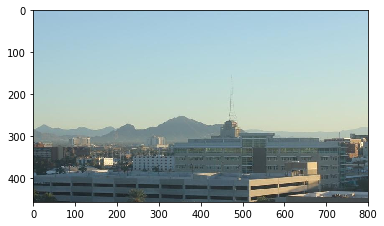

In [107]:
# Print out 1. The shape of the image and 2. The image's label

# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label: " + str(selected_label))


# 2. Pre-process the Data

After loading in each image, you have to standardize the input and output. 

#### Solution code

You are encouraged to try to complete this code on your own, but if you are struggling or want to make sure your code is correct, there i solution code in the `helpers.py` file in this directory. You can look at that python file to see complete `standardize_input` and `encode` function code. For this day and night challenge, you can often jump one notebook ahead to see the solution code for a previous notebook!


---
### Input

It's important to make all your images the same size so that they can be sent through the same pipeline of classification steps! Every input image should be in the same format, of the same size, and so on.

#### TODO: Standardize the input images

* Resize each image to the desired input size: 600x1100px (hxw).

In [108]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## TODO: Resize image so that all "standard" images are the same size 600x1100 (hxw) 
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im
    

### TODO: Standardize the output

With each loaded image, you also need to specify the expected output. For this, use binary numerical values 0/1 = night/day.

In [109]:
# Examples: 
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
        
    numerical_val = 0
    ## TODO: complete the code to produce a numerical label
    if label == 'day': numerical_val = 1
    
    return numerical_val


## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

This uses the functions you defined above to standardize the input and output, so those functions must be complete for this standardization to work!


In [129]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Create a numerical label
        binary_label = encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


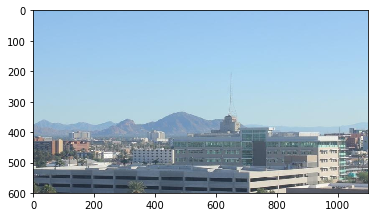

In [130]:
# Display a standardized image and its label

# Select an image by index
image_num = 3
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
## TODO: Make sure the images have numerical labels and are of the same size
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))


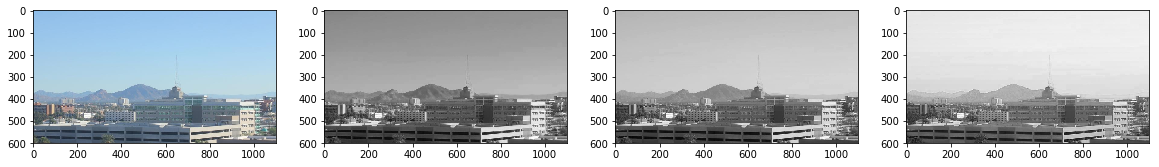

In [112]:
# Understand HSV channel variation

hsv_image = np.copy(selected_image)

h = hsv_image[:,:,0]
s = hsv_image[:,:,1]
v = hsv_image[:,:,2]

f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,20))

ax1.imshow(hsv_image)
ax2.imshow(h,cmap='gray')
ax3.imshow(s,cmap='gray')
ax4.imshow(v,cmap='gray')

# Find avg brightness using V channel

In [131]:
# get average brightness of each photo
def avg_brightness(rgb_image):
    
    rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
    hsv_img = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    # add pixel value in V channel
    sum_brightness = np.sum(hsv_img[:,:,2])
    
    # area of image
    area = 600 * 1100.0 # pixels
    
    # calculate average brightness
    avg = sum_brightness / area
    
    return avg
    

Avg brightness of this 1 image is:200.02027575757575


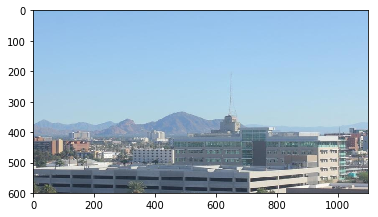

In [132]:
# check day,night img and their avg brightness
image_num = 5



test_img = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

avg_img = avg_brightness(test_img)

print('Avg brightness of this',test_label,'image is:' + str(avg_img))
plt.imshow(test_img)



In [115]:
# to find the threshold value
#avg_value = {}
#max = float(205)
#min = float(0)
#for i in range(0,200):
#    tst_img = STANDARDIZED_LIST[i][0]
#    tst_label = STANDARDIZED_LIST[i][1]
#    avg_img = avg_brightness(tst_img)
#    avg_value[tst_label] = avg_img
#    if tst_label == 1:
#        if avg_value[tst_label] < max:
#              max = avg_value[tst_label]
#    if tst_label == 0:
#        if avg_value[tst_label] > min:
#              min = avg_value[tst_label]

#print('Min value of Day Brightness is:', max)
#print('Max value of Night Brightness is:', min)

In [176]:
# predict label with this function
def estimate_label(rgb_image):
    # estimate the avg brightness
    avg_bright = avg_brightness(rgb_image)
    
    # use this avg_brightness feature to predict label
    predicted_label = 0 # let default prediction be 0 for night
    
    # set threshold to classify images based on the threshold boundary value
    threshold = 108
    
    if avg_bright > threshold:predicted_label = 1
    
    return predicted_label

Night Image


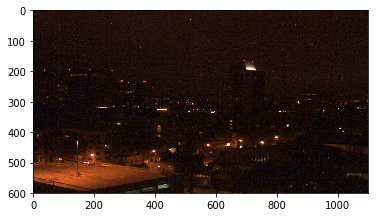

In [140]:
test_img = STANDARDIZED_LIST[120][0]
plt.imshow(test_img)
if estimate_label(test_img) == 1:
    print('Day Image')
else:
    print('Night Image')

# Load test data and understand accuracy

In [146]:
import random

# load test data
TEST_IMAGE_LIST = load_dataset(image_dir_test)
# Standardize all test images
TEST_STANDARDIZED_LIST = standardize(TEST_IMAGE_LIST)

#shuffle the standarized test data
random.shuffle(TEST_STANDARDIZED_LIST)

<class 'list'>


# Determine the accuracy

In [177]:
def get_misclassified_images(test_images):
    misclassified_image_label = []
    
    #iterate through all images
    for imagee in test_images:
        im = imagee[0]
        true_label = imagee[1]
        
        predicted_label = estimate_label(im)
        
        if(predicted_label != true_label):
            misclassified_image_label.append((im,predicted_label,true_label))
    
    return misclassified_image_label      

In [178]:
MISCLASSIFIFIED = get_misclassified_images(TEST_STANDARDIZED_LIST)

# calculate accuracy

total = len(TEST_STANDARDIZED_LIST)
correct_num_images = total - len(MISCLASSIFIFIED)

accuracy = correct_num_images / total

print('Accuracy is:' + str(accuracy))
print('No. of misclassified images = '+ str(len(MISCLASSIFIFIED)) + ' out of ' + str(total))

Accuracy is:0.89375
No. of misclassified images = 17 out of 160


In [179]:
print('0 -- Night //// 1 --- Day')
for mis in MISCLASSIFIFIED:
    img = mis[0]
    pred_label = mis[1]
    actual = mis[2]
    bright = avg_brightness(img)
    print('Avg Brightness: ', bright)
    print('predict',pred_label,'actual',actual)
#plt.imshow(mis_image)

0 -- Night //// 1 --- Day
Avg Brightness:  116.5026303030303
predict 1 actual 0
Avg Brightness:  105.00174696969697
predict 0 actual 1
Avg Brightness:  105.52998333333333
predict 0 actual 1
Avg Brightness:  176.83091515151514
predict 1 actual 0
Avg Brightness:  111.30017575757576
predict 1 actual 0
Avg Brightness:  103.34151666666666
predict 0 actual 1
Avg Brightness:  104.13673181818181
predict 0 actual 1
Avg Brightness:  98.97808181818182
predict 0 actual 1
Avg Brightness:  93.14052727272727
predict 0 actual 1
Avg Brightness:  175.5829106060606
predict 1 actual 0
Avg Brightness:  110.77786515151516
predict 1 actual 0
Avg Brightness:  98.86885303030303
predict 0 actual 1
Avg Brightness:  108.22847575757575
predict 1 actual 0
Avg Brightness:  99.53764090909091
predict 0 actual 1
Avg Brightness:  107.57914545454545
predict 0 actual 1
Avg Brightness:  105.51303333333334
predict 0 actual 1
Avg Brightness:  111.82628939393939
predict 1 actual 0


109.13443333333333


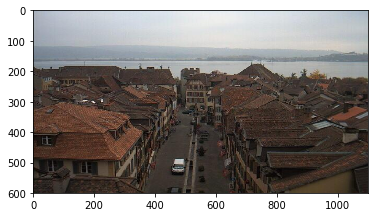

In [175]:
testty_img = MISCLASSIFIFIED[10][0]
avgg = avg_brightness(testty_img)
print(avgg)
plt.imshow(testty_img)